In [1]:
import uproot
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
fileName = '/Users/isobel/Desktop/DUNE/2024/Hierarchy/files/ccnutree_0'
inputFileName = fileName + '.root'

treeFile = uproot.open(inputFileName)
tree = treeFile['ccnuselection/ccnusel']
branches = tree.arrays()

In [3]:
event = np.array(branches['Event'])
subrun = np.array(branches['SubRun'])
run = np.array(branches['Run'])


In [4]:
target_event = 37133
target_run = 1434

print(np.where(np.logical_and(event == target_event, run == target_run)))
 
iEvent = np.where(np.logical_and(event == target_event, run == target_run))[0][0]

(array([7932]),)


In [5]:
parentIndex_main = branches['ParentPFPIndex']
childIndex_main = branches['ChildPFPIndex']
linkTruth_main = branches['TrueParentChildLink']
isLinkOrientationCorrect_main = branches['IsLinkOrientationCorrect']
parentTrackScore_main = branches['ParentTrackScore']
parentNuVertexSeparation_main = branches['ParentNuVertexSeparation']
childNuVertexSeparation_main = branches['ChildNuVertexSeparation']
parentEndRegionNHits_main = branches['ParentEndRegionNHits']
parentEndRegionNParticles_main = branches['ParentEndRegionNParticles']
parentEndRegionRToWall_main = branches['ParentEndRegionRToWall']
vertexSeparation_main = branches['VertexSeparation']
separation3D_main = branches['Separation3D']
doesChildConnect_main = branches['DoesChildConnect']
overshootStartDCA_main = branches['OvershootStartDCA']
overshootStartL_main = branches['OvershootStartL']
overshootEndDCA_main = branches['OvershootEndDCA']
overshootEndL_main = branches['OvershootEndL']
childConnectionDCA_main = branches['ChildConnectionDCA']
childConnectionExtrapDistance_main = branches['ChildConnectionExtrapDistance']
childConnectionLRatio_main = branches['ChildConnectionLRatio']
parentConnectionPointNUpstreamHits_main = branches['ParentConnectionPointNUpstreamHits']
parentConnectionPointNDownstreamHits_main = branches['ParentConnectionPointNDownstreamHits']
parentConnectionPointNHitRatio_main = branches['ParentConnectionPointNHitRatio']
parentConnectionPointEigenValueRatio_main = branches['ParentConnectionPointEigenValueRatio']
parentConnectionPointOpeningAngle_main = branches['ParentConnectionPointOpeningAngle']
pidLinkType_main = branches['PIDLinkType']




parentIndex = np.array(branches['ParentPFPIndex'][iEvent])
childIndex = np.array(branches['ChildPFPIndex'][iEvent])
linkTruth = np.array(branches['TrueParentChildLink'][iEvent])
isLinkOrientationCorrect = np.array(branches['IsLinkOrientationCorrect'][iEvent])  
parentTrackScore = branches['ParentTrackScore'][iEvent]
parentNuVertexSeparation = branches['ParentNuVertexSeparation'][iEvent]
childNuVertexSeparation = branches['ChildNuVertexSeparation'][iEvent]
parentEndRegionNHits = branches['ParentEndRegionNHits'][iEvent]
parentEndRegionNParticles = branches['ParentEndRegionNParticles'][iEvent]
parentEndRegionRToWall = branches['ParentEndRegionRToWall'][iEvent]
vertexSeparation = branches['VertexSeparation'][iEvent]
separation3D = branches['Separation3D'][iEvent]
doesChildConnect = branches['DoesChildConnect'][iEvent]
overshootStartDCA = branches['OvershootStartDCA'][iEvent]
overshootStartL = branches['OvershootStartL'][iEvent]
overshootEndDCA = branches['OvershootEndDCA'][iEvent]
overshootEndL = branches['OvershootEndL'][iEvent]
childConnectionDCA = branches['ChildConnectionDCA'][iEvent]
childConnectionExtrapDistance = branches['ChildConnectionExtrapDistance'][iEvent]
childConnectionLRatio = branches['ChildConnectionLRatio'][iEvent]
parentConnectionPointNUpstreamHits = branches['ParentConnectionPointNUpstreamHits'][iEvent]
parentConnectionPointNDownstreamHits = branches['ParentConnectionPointNDownstreamHits'][iEvent]
parentConnectionPointNHitRatio = branches['ParentConnectionPointNHitRatio'][iEvent]
parentConnectionPointEigenValueRatio = branches['ParentConnectionPointEigenValueRatio'][iEvent]
parentConnectionPointOpeningAngle = branches['ParentConnectionPointOpeningAngle'][iEvent]
pidLinkType = branches['PIDLinkType'][iEvent]


In [6]:
target_parentPFPIndex = 8
target_childPFPIndex = 13

print(np.where(np.logical_and(parentIndex == target_parentPFPIndex, childIndex == target_childPFPIndex)))
iLinks = np.where(np.logical_and(parentIndex == target_parentPFPIndex, childIndex == target_childPFPIndex))[0]

(array([576, 577, 578, 579]),)


In [7]:
def flatten_comprehension(matrix):
    return [item for row in matrix for item in row]

def drawSignalBackgroundGroup_track(variable0, link_truth, link_orientation, instance, graph_label) :
    
    variable_flat = np.array(flatten_comprehension(variable0))
    link_truth_flat = np.array(flatten_comprehension(link_truth))
    link_orientation_flat = np.array(flatten_comprehension(link_orientation))
    
    signal_mask = np.logical_and(link_truth_flat, link_orientation_flat)
    
    variable_signal = variable_flat[signal_mask]
    
    signal_weights = 1.0 / float(variable_signal.shape[0])
    signal_weights = np.ones(variable_signal.shape[0]) * signal_weights
        
    # Adding an arrow to graph starting 
# from the base (2, 4) and with the 
# length of 2 units from both x and y
# And setting the width of arrow for
# better visualization
    plt.arrow(instance, 0, 0, -2, width = 0.05)
        
    plt.hist(variable_signal, bins=50, color='blue', weights=signal_weights, label='signal', fill=False, histtype='step')
    plt.title(graph_label)
    plt.xlabel(graph_label)
    plt.legend()
    plt.grid(True)
    plt.show()   

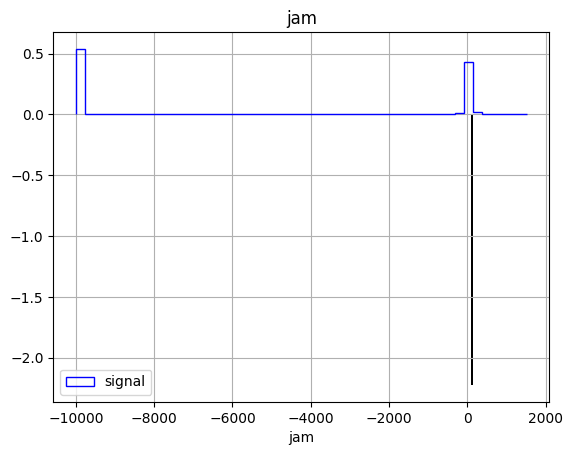

linkTruth: False
isLinkOrientationCorrect: False
doesChildConnect: False
overshootEndDCA: 120.6773790663856
pidLinkType: 12.0
parentTrackScore: 0.592997133731842
separation3D: 43.39015659805454
parentEndRegionNHits: 57.0
vertexSeparation: 196.08118845066377
-


KeyboardInterrupt: 

In [8]:
for iLink in iLinks :
    drawSignalBackgroundGroup_track(overshootEndDCA_main, linkTruth_main, isLinkOrientationCorrect_main, overshootEndDCA_main[iEvent][iLink], 'jam')
    print('linkTruth:', linkTruth[iLink])
    print('isLinkOrientationCorrect:', isLinkOrientationCorrect[iLink])  
    print('doesChildConnect:', doesChildConnect[iLink])
    print('overshootEndDCA:', overshootEndDCA[iLink])
    print('pidLinkType:', pidLinkType[iLink])
    print('parentTrackScore:', parentTrackScore[iLink])
    print('separation3D:', separation3D[iLink])
    print('parentEndRegionNHits:', parentEndRegionNHits[iLink])
    print('vertexSeparation:', vertexSeparation[iLink])
    print('-')

In [ ]:
            if (parentIndex.shape[0] != 0) :
                currentParent = parentIndex[0]
                currentChild = childIndex[0]
                linksMadeCounter = 1

                print('Looping through the links in this event...')
                print('parentIndex.shape[0]', parentIndex.shape[0])

                for iLink in range(1, parentIndex.shape[0]) :

                    if ((currentParent != parentIndex[iLink]) or (currentChild != childIndex[iLink])) :
                        nLinksMade.append(linksMadeCounter)
                        signal_nLinksMade.append(linkTruth[iLink - 1])
                        
                        linksMadeCounter = 0
                        currentParent = parentIndex[iLink]
                        currentChild = childIndex[iLink]

                    linksMadeCounter = linksMadeCounter + 1

                print('Finished...')
            
            # Edge information
            
            # Truth 
            trueParentChildLink.extend(branches['TrueParentChildLink'][iEvent])
            isHigherTierTrainingLink.extend(branches['IsHigherTierTrainingLink'][iEvent])
            isLinkOrientationCorrect.extend(branches['IsLinkOrientationCorrect'][iEvent])